## Proyek Akhir: Analisis Data Superstore Sederhana

**Skenario: Anda adalah seorang analis data di sebuah perusahaan ritel. Anda diberikan data penjualan dari beberapa produk selama satu bulan. Tugas Anda adalah melakukan analisis dari awal hingga akhir: memuat data, membersihkannya, menganalisisnya, dan akhirnya memvisualisasikan temuan Anda untuk dilaporkan kepada manajer.**

-------

**1: Persiapan Data (Dictionaries & Pandas)**

In [67]:
import pandas as pd

data_penjualan = {
    'Tanggal' : ['2024-07-01', '2024-07-01', '2024-07-02', '2024-07-03', '2024-07-03', '2024-07-04'],
    'Produk' : ['Laptop', 'Mouse', 'Laptop', 'Monitor', 'Keyboard', 'Mouse'],
    'Kategori': ['Elektronik', 'Aksesoris', 'Elektronik', 'Elektronik', 'Aksesoris', 'Aksesoris'],
    'Harga Satuan': [15000000, 150000, 15500000, 3500000, 750000, 160000],
    'Jumlah Terjual': [5, 10, 3, 7, 8, 12]
}

df_penjualan = pd.DataFrame(data_penjualan)
df_penjualan.head()

,Tanggal,Produk,Kategori,Harga Satuan,Jumlah Terjual
0,2024-07-01,Laptop,Elektronik,15000000,5
1,2024-07-01,Mouse,Aksesoris,150000,10
2,2024-07-02,Laptop,Elektronik,15500000,3
3,2024-07-03,Monitor,Elektronik,3500000,7
4,2024-07-03,Keyboard,Aksesoris,750000,8


----

**2: Menambah Kolom Baru (NumPy & Looping)**

***Manajer ingin tahu total pendapatan untuk setiap transaksi.***
- Buat kolom baru bernama 'Total Pendapatan'.
- Isi kolom ini dengan hasil perkalian dari 'Harga Satuan' dan 'Jumlah Terjual'. Gunakan operasi vektorisasi NumPy untuk melakukannya tanpa perulangan.

In [68]:
import numpy as np

                                   # honestly, di projek nyata np.array itu jarang dipakai, karena pandas sudah sangat powerful 
                                   # atau pandas sendiri sudah dibangun di atas numpy (tujuan edukasi aja kali ya)                                  
df_penjualan['Total Pendapatan'] = np.array(df_penjualan['Harga Satuan']) * np.array(df_penjualan['Jumlah Terjual'])
                                                                # inplace=True melakukan perubahan pada df_penjualan langsung atau dataframe aslinya
df_penjualan.sort_values(by='Total Pendapatan', ascending=False, inplace=True)
df_penjualan


#another way hanya lebih lambat
# total_pendapatan = []

# for i in range(len(df_penjualan)):
#     harga = df_penjualan.loc[i, 'Harga Satuan']
#     jumlah = df_penjualan.loc[i, 'Jumlah Terjual']
#     total = harga * jumlah
#     total_pendapatan.append(total)

# df_penjualan['Total Pendapatan'] = total_pendapatan
# df_penjualan.sort_values(by='Total Pendapatan', ascending=False, inplace=True)



,Tanggal,Produk,Kategori,Harga Satuan,Jumlah Terjual,Total Pendapatan
0,2024-07-01,Laptop,Elektronik,15000000,5,75000000
2,2024-07-02,Laptop,Elektronik,15500000,3,46500000
3,2024-07-03,Monitor,Elektronik,3500000,7,24500000
4,2024-07-03,Keyboard,Aksesoris,750000,8,6000000
5,2024-07-04,Mouse,Aksesoris,160000,12,1920000
1,2024-07-01,Mouse,Aksesoris,150000,10,1500000


---

**3: Analisis Data (Filtering & Logika)**

***Manajer ingin mengetahui beberapa hal spesifik:***
- Transaksi "Besar": Tampilkan semua transaksi di mana 'Total Pendapatan' lebih dari Rp 20.000.000.
- Penjualan Aksesoris Laris: Tampilkan semua transaksi dari kategori 'Aksesoris' DAN 'Jumlah Terjual' lebih dari 9 unit.

In [69]:
# 1. Transaksi "Besar": Tampilkan semua transaksi di mana 'Total Pendapatan' lebih dari Rp 20.000.000.
Transaksi_besar = df_penjualan[df_penjualan['Total Pendapatan'] > 20000000]
print("\nTabel beberapa produk dengan transaksi Terbesar")
Transaksi_besar


Tabel beberapa produk dengan transaksi Terbesar


,Tanggal,Produk,Kategori,Harga Satuan,Jumlah Terjual,Total Pendapatan
0,2024-07-01,Laptop,Elektronik,15000000,5,75000000
2,2024-07-02,Laptop,Elektronik,15500000,3,46500000
3,2024-07-03,Monitor,Elektronik,3500000,7,24500000


In [70]:
# 2. Penjualan Aksesoris Laris: Tampilkan semua transaksi dari kategori 'Aksesoris' DAN 'Jumlah Terjual' lebih dari 9 unit.
aksesori_laris = df_penjualan[(df_penjualan['Kategori'] == 'Aksesoris') & (df_penjualan['Jumlah Terjual'] > 9)]
print("\nTabel beberapa produk Aksesoris yang terjual lebih dari 9 unit")
aksesori_laris



Tabel beberapa produk Aksesoris yang terjual lebih dari 9 unit


,Tanggal,Produk,Kategori,Harga Satuan,Jumlah Terjual,Total Pendapatan
5,2024-07-04,Mouse,Aksesoris,160000,12,1920000
1,2024-07-01,Mouse,Aksesoris,150000,10,1500000


-----

**Langkah 4: Visualisasi Data (Matplotlib)**

***Buat dua visualisasi sederhana untuk laporan:***
- Pendapatan per Kategori: Buat sebuah Bar Chart yang menunjukkan total pendapatan untuk setiap kategori ('Elektronik' vs 'Aksesoris').
    - Petunjuk: Anda mungkin perlu menggunakan metode .groupby('Kategori')['Total Pendapatan'].sum() untuk mendapatkan datanya terlebih dahulu.

- Hubungan Harga dan Jumlah Terjual: Buat sebuah Scatter Plot untuk melihat apakah ada hubungan antara 'Harga Satuan' (sumbu x) dan 'Jumlah Terjual' (sumbu y). Beri judul dan label yang sesuai pada plot Anda.

total pendapatan tiap kategori
      Kategori  Total Pendapatan
0   Aksesoris           9420000
1  Elektronik         146000000


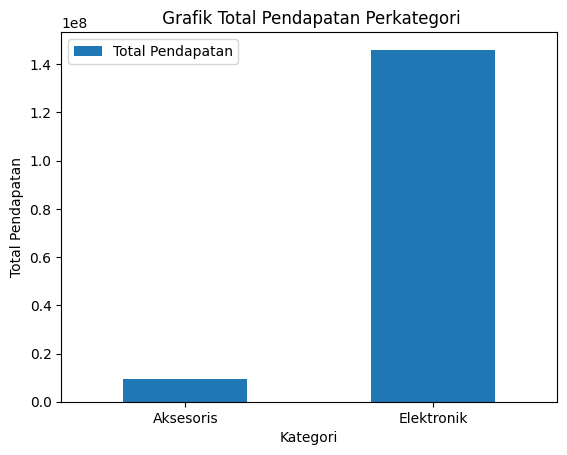

In [71]:
import matplotlib.pyplot as plt

# 1. pendapatan_per_kategori
total_pendapata_per_kategori = df_penjualan.groupby('Kategori')['Total Pendapatan'].sum().reset_index()
print("total pendapatan tiap kategori\n",total_pendapata_per_kategori)

total_pendapata_per_kategori.plot(kind='bar', x='Kategori', y='Total Pendapatan')
plt.title(' Grafik Total Pendapatan Perkategori')
plt.xlabel('Kategori')
plt.xticks(rotation=0)
plt.ylabel('Total Pendapatan')
plt.show()

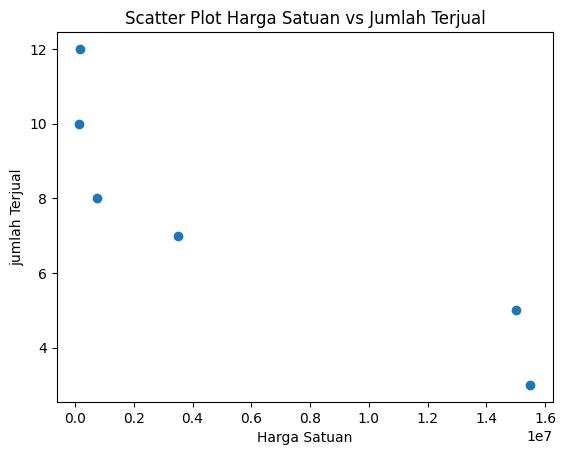

Korelasi antara Harga Satuan dan Jumlah Terjual: -0.89


In [72]:
# 2. Hubungan Harga dan Jumlah Terjual

plt.scatter(df_penjualan['Harga Satuan'], df_penjualan['Jumlah Terjual'])
plt.xlabel("Harga Satuan")
plt.ylabel("jumlah Terjual")
plt.title("Scatter Plot Harga Satuan vs Jumlah Terjual")
plt.show()


#hitung korelasi suhu dan curah hujan
korelasi = np.corrcoef(df_penjualan['Harga Satuan'], df_penjualan['Jumlah Terjual'],)[0, 1]
print(f"Korelasi antara Harga Satuan dan Jumlah Terjual: {korelasi:.2f}")

semakin mahal harga suatu barang, semakin sedikit jumlah yang terjual. Ini adalah wawasan bisnis yang sangat penting.